In [1]:
%matplotlib inline

In [6]:
import gym
import numpy as np
import random as pr
import matplotlib.pyplot as plt

"""
Frozen-lake actions:
LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3
"""

def rargmax(vector):
    # Blotzman-like policy strategy
    m = np.amax(vector)
    indices = np.nonzero(vector==m)[0]
    return pr.choice(indices)

def degreedy(env, vector, episode, epsilon1=0.8, epsilon2=0, Nstop=500):
    gamma = np.max((Nstop-episode)/Nstop,0)
    epsilon = (epsilon1 - epsilon2) * gamma + epsilon2
    r = np.random.random()
    if r < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(vector)

def qlearn_base(env, Q, num_episodes=100):
    """
    action을 Q값에서 바로 결정 (단, 동일한 Q(s,a)들에 대해서는 확률적으로 선택함)
    - action = rargmax(Q[state,:])
    """
    rList = []
    for i in range(num_episodes):
        state = env.reset()
        rAll = 0
        done = False
        while not done:
            action = rargmax(Q[state,:])
            new_state, reward, done, _ = env.step(action)
            Q[state,action] = reward + np.max(Q[new_state,:])
            state = new_state      
            # done까지 여기서는 reward가 한번 밖에 없음. 따라서 rAll은 reward를 사용해도 동일함.
            rAll += reward
        rList.append(rAll)        
    return rList

def qlearn_random(env, Q, num_episodes=100):
    """
    action을 random을 더해서 결정함.
    - action = np.argmax(Q[state,:] + np.random.randn(1,env.action_space.n) / (i+1))
    """
    rList = []
    for i in range(num_episodes):
        state = env.reset()
        rAll = 0
        done = False
        while not done:
            # action = rargmax(Q[state,:])
            action = np.argmax(Q[state,:] + np.random.randn(1,env.action_space.n) / (i+1))
            new_state, reward, done, _ = env.step(action)
            Q[state,action] = reward + np.max(Q[new_state,:])
            state = new_state      
            # done까지 여기서는 reward가 한번 밖에 없음. 따라서 rAll은 reward를 사용해도 동일함.
            rAll += reward
        rList.append(rAll)        
    return rList

def qlearn_discount(env, Q, num_episodes=100, discount=0.99):
    """
    action을 random을 더해서 결정함.
    - action = np.argmax(Q[state,:] + np.random.randn(1,env.action_space.n) / (i+1))
    """
    rList = []
    for i in range(num_episodes):
        state = env.reset()
        rAll = 0
        done = False
        while not done:
            action = rargmax(Q[state,:])
            new_state, reward, done, _ = env.step(action)
            Q[state,action] = reward + discount * np.max(Q[new_state,:])
            state = new_state      
            # done까지 여기서는 reward가 한번 밖에 없음. 따라서 rAll은 reward를 사용해도 동일함.
            rAll += reward
        rList.append(rAll)        
    return rList

def qlearn_discount_lr(env, Q, num_episodes=100, discount=0.99, lr=0.85):
    """
    action을 random을 더해서 결정함.
    - action = np.argmax(Q[state,:] + np.random.randn(1,env.action_space.n) / (i+1))
    """
    rList = []
    for i in range(num_episodes):
        state = env.reset()
        rAll = 0
        done = False
        while not done:
            action = rargmax(Q[state,:])
            new_state, reward, done, _ = env.step(action)
            Q[state,action] = (1-lr)*Q[state,action] + lr * (reward + discount * np.max(Q[new_state,:]))
            state = new_state      
            # done까지 여기서는 reward가 한번 밖에 없음. 따라서 rAll은 reward를 사용해도 동일함.
            rAll += reward
        rList.append(rAll)        
    return rList

def qlearn_random_discount_lr(env, Q, num_episodes=100, discount=0.99, lr=0.85):
    """
    action을 random을 더해서 결정함.
    - action = np.argmax(Q[state,:] + np.random.randn(1,env.action_space.n) / (i+1))
    """
    rList = []
    for i in range(num_episodes):
        state = env.reset()
        rAll = 0
        done = False
        while not done:
            # action = rargmax(Q[state,:])
            action = np.argmax(Q[state,:] + np.random.randn(1,env.action_space.n) / (i+1))
            new_state, reward, done, _ = env.step(action)
            Q[state,action] = (1-lr)*Q[state,action] + lr * (reward + discount * np.max(Q[new_state,:]))
            state = new_state      
            # done까지 여기서는 reward가 한번 밖에 없음. 따라서 rAll은 reward를 사용해도 동일함.
            rAll += reward
        rList.append(rAll)        
    return rList

def qlearn_degreedy_discount_lr(env, Q, num_episodes=100, discount=0.99, lr=0.85, epsilon=0.8, Nstop=1000):
    """
    action을 random을 더해서 결정함.
    - action = np.argmax(Q[state,:] + np.random.randn(1,env.action_space.n) / (i+1))
    """
    rList = []
    for i in range(num_episodes):
        state = env.reset()
        rAll = 0
        done = False
        while not done:
            # action = rargmax(Q[state,:])
            #action = np.argmax(Q[state,:] + np.random.randn(1,env.action_space.n) / (i+1))
            action = degreedy(env, Q[state,:], i, epsilon1=epsilon, Nstop=Nstop)
            new_state, reward, done, _ = env.step(action)
            Q[state,action] = (1-lr)*Q[state,action] + lr * (reward + discount * np.max(Q[new_state,:]))
            state = new_state      
            # done까지 여기서는 reward가 한번 밖에 없음. 따라서 rAll은 reward를 사용해도 동일함.
            rAll += reward
        rList.append(rAll)        
    return rList

def qlearn_mode(mode, env, Q, num_episodes=100):
    if mode == 'base':
        return qlearn_base(env, Q, num_episodes=num_episodes)
    elif mode == 'random': # random action
        return qlearn_random(env, Q, num_episodes=num_episodes)        
    elif mode == 'discount':
        return qlearn_discount(env, Q, num_episodes=num_episodes)
    elif mode == 'discount_lr':
        return qlearn_discount_lr(env, Q, num_episodes=num_episodes)    
    elif mode == 'random_discount_lr':
        return qlearn_random_discount_lr(env, Q, num_episodes=num_episodes)    
    elif mode == 'degreedy_discount_lr':
        return qlearn_degreedy_discount_lr(env, Q, num_episodes=num_episodes)    
    
def run(mode, num_episodes=2000):
    print("Supporting modes: base, random, discount, discount_lr, random_discount_lr, degreedy_discount_lr") 
    print(f'Current mode: {mode}')
    
    env = gym.make("FrozenLake-v0", map_name='4x4', is_slippery=False)
    Q = np.zeros([env.observation_space.n, env.action_space.n])

    rList = qlearn_mode(mode, env, Q, num_episodes)
    print(f"Total success rate: {sum(rList)/num_episodes}")
    plt.bar(range(len(rList)), 1-np.array(rList))
    plt.title('Show 1-reward')
    plt.show()

    print("Final Q-table")
    print(Q)
    print()

    print("Frozen-Lake Map at the Final State")
    # env.reset()
    env.render()
    print()

    print("Final action for each state in Q")
    action_list = ["LEFT", "DOWN", "RIGHT", "UP"]
    for i, q in enumerate(Q):
        print(action_list[np.argmax(q)], end=',')
        if i % 4 == 3:
            print()

Supporting modes: base, random, discount, discount_lr, random_discount_lr, degreedy_discount_lr
Current mode: base
Total success rate: 0.85


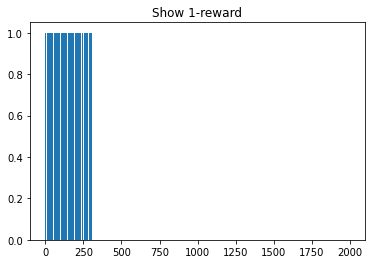

Final Q-table
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]

Frozen-Lake Map at the Final State
  (Right)
SFFF
FHFH
FFFH
HFFG

Final action for each state in Q
DOWN,LEFT,LEFT,LEFT,
DOWN,LEFT,LEFT,LEFT,
RIGHT,RIGHT,DOWN,LEFT,
LEFT,RIGHT,RIGHT,LEFT,


In [7]:
run('base')

Supporting modes: base, random, discount, discount_lr, random_discount_lr, degreedy_discount_lr
Current mode: random
Total success rate: 0.9055


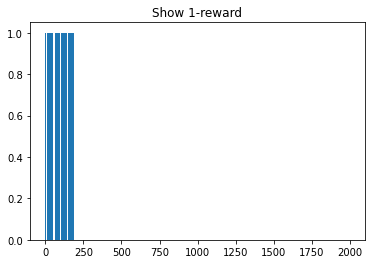

Final Q-table
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]

Frozen-Lake Map at the Final State
  (Right)
SFFF
FHFH
FFFH
HFFG

Final action for each state in Q
DOWN,LEFT,LEFT,LEFT,
DOWN,LEFT,LEFT,LEFT,
RIGHT,RIGHT,DOWN,LEFT,
LEFT,LEFT,RIGHT,LEFT,


In [8]:
run('random')

Supporting modes: base, random, discount, discount_lr, random_discount_lr, degreedy_discount_lr
Current mode: discount
Total success rate: 0.97


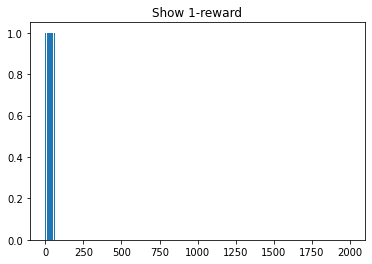

Final Q-table
[[0.         0.         0.95099005 0.        ]
 [0.         0.         0.96059601 0.        ]
 [0.         0.970299   0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.99       0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.99       0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         0.        ]]

Frozen-Lake Map at the Final State
  (Right)
SFFF
FHFH
FFFH
HFFG

Final action for each state in Q
RIGHT,RIGHT,DOWN,LEFT,
LEFT,LEFT,DOWN,LEFT,
LEFT,LEFT,DOWN,LEFT,
LEFT,RIGHT,RIGHT,LEFT,


In [9]:
run('discount')

Supporting modes: base, random, discount, discount_lr, random_discount_lr, degreedy_discount_lr
Current mode: discount_lr
Total success rate: 0.9585


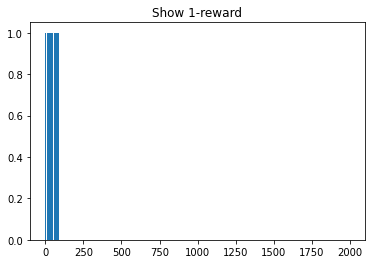

Final Q-table
[[0.         0.         0.95099005 0.        ]
 [0.         0.         0.96059601 0.        ]
 [0.         0.970299   0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.99       0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         0.        ]]

Frozen-Lake Map at the Final State
  (Right)
SFFF
FHFH
FFFH
HFFG

Final action for each state in Q
RIGHT,RIGHT,DOWN,LEFT,
LEFT,LEFT,DOWN,LEFT,
LEFT,LEFT,DOWN,LEFT,
LEFT,LEFT,RIGHT,LEFT,


In [10]:
run('discount_lr')

Supporting modes: base, random, discount, discount_lr, random_discount_lr, degreedy_discount_lr
Current mode: random_discount_lr
Total success rate: 0.856


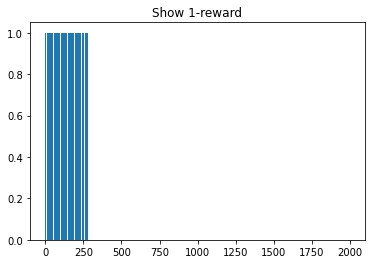

Final Q-table
[[0.         0.         0.95099005 0.        ]
 [0.         0.         0.96059601 0.        ]
 [0.         0.970299   0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.99       0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         0.        ]]

Frozen-Lake Map at the Final State
  (Right)
SFFF
FHFH
FFFH
HFFG

Final action for each state in Q
RIGHT,RIGHT,DOWN,LEFT,
LEFT,LEFT,DOWN,LEFT,
LEFT,LEFT,DOWN,LEFT,
LEFT,LEFT,RIGHT,LEFT,


In [11]:
run('random_discount_lr')

Supporting modes: base, random, discount, discount_lr, random_discount_lr, degreedy_discount_lr
Current mode: degreedy_discount_lr
Total success rate: 0.7295


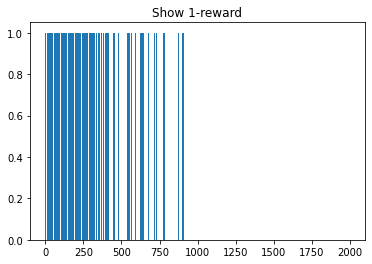

Final Q-table
[[0.94148015 0.95099005 0.93206535 0.94148015]
 [0.94148015 0.         0.92274469 0.93159349]
 [0.93206535 0.         0.         0.        ]
 [0.78433299 0.         0.         0.        ]
 [0.95099005 0.96059601 0.         0.94148015]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.91963043]
 [0.         0.         0.         0.        ]
 [0.96059601 0.         0.970299   0.95099005]
 [0.96059601 0.9801     0.9801     0.        ]
 [0.970299   0.99       0.         0.85802107]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.99       0.970299  ]
 [0.9801     0.99       1.         0.9801    ]
 [0.         0.         0.         0.        ]]

Frozen-Lake Map at the Final State
  (Right)
SFFF
FHFH
FFFH
HFFG

Final action for each state in Q
DOWN,LEFT,LEFT,LEFT,
DOWN,LEFT,UP,LEFT,
RIGHT,DOWN,DOWN,LEFT,
LEFT,RIGHT,RIGHT,LEFT,


In [12]:
run('degreedy_discount_lr')